In [4]:
from os import walk
import os
import pandas as pd
import subprocess
import sys
import nltk
import time
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import time
import json
import re
import urllib2
import unicodedata
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

wordnet_tags = ['n', 'v', 'a', 's', 'r']
%matplotlib inline


# The main code, built from testing, is in the cell immediately below. 

In [5]:
# from http://brandonrose.org/clustering



from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = SnowballStemmer("english")
lemmer = WordNetLemmatizer()
wordnet_tags = ['n', 'v', 'a', 's', 'r']

def tokenize_and_stem_n_lem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    ''' 
    Old code gave seperate lists for lem and stem; I lemmed, then just stemmed the result
    #stems = [stemmer.stem(t) for t in filtered_tokens]
    #lems = [lemmer.lemmatize(l) for l in filtered_tokens]
    '''
    stems = [stemmer.stem(lemmer.lemmatize(l)) for l in filtered_tokens]
    
    #return stems,lems
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [6]:
import time
from tqdm import *

In [46]:


path        = os.path.abspath(os.getcwd())
TESTDIR     = os.path.normpath(os.path.join(os.path.expanduser("~"),"projects","LC3-Creations", "examples","KDDsample"))

corpus = {}
%time
start_time = time.time()
for dirName, subdirList, fileList in tqdm(walk(TESTDIR)):    
    for fileName in fileList:
        if fileName.startswith('p') and fileName.endswith('.pdf'):
            a = unicode(subprocess.check_output(['pdf2txt.py',str(os.path.normpath(os.path.join(TESTDIR,fileName)))]),errors='ignore')
            document = unicodedata.normalize('NFKD', a).encode('ascii','ignore')

            if len(document)<300:
                pass
            else:

                # The entire document
                body = re.sub('[\s]'," ",document)

                # Getting title
                title = re.findall("^[^\\n\\n]+",document)[0]

                # Getting the abstract
                try:
                    abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)\n',document[:2000])
                except IndexError:
                    abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)\n',document[:2000])[0]
                else:
                    abstract = abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)\n',document[:2000])[0][1]

                if isinstance(abstract, tuple):
                    abstract = re.sub('[\s]'," ",abstract[1])
                elif isinstance(abstract,list):
                    abstract = re.sub('[\s]'," ",abstract[1])
                elif isinstance(abstract,str):
                    abstract = re.sub('[\s]'," ", abstract)


                # Extracts section with names and email addresses only
                section  = re.findall (r'\n\n([^]]*)\n\n(Abstract|ABSTRACT)',document[:2000])

                type(section[0][0])

                if isinstance(section, list):
                    section = re.sub('[\s]'," ",section[0][0])
                else:
                    section = re.sub('[\s]'," ",section)


                # Code to extract entities from top section of pdf and store a relationship tree
                tagged = nltk.pos_tag(nltk.word_tokenize(section))
                entities = nltk.chunk.ne_chunk(tagged)

                # Another entity extractor
                st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.conll.4class.distsim.crf.ser.gz',
                       '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar',
                       encoding='utf-8')
                tokenized_text = word_tokenize(section)
                stanentities = st.tag(tokenized_text)

                # Calls function to lemmatize and stem the document; stores the result
                tokenize_and_stem_n_lem(abstract);

                '''
                This gives seperate lists for lem and stem; replacement code stores combin
                # Creates the json document format to store the files
                corpus[str(fileName)]={}
                corpus[str(fileName)]={'Title':title,'Abstract':abstract,'Entities':entities, 
                                       "Stanford ER":stanentities, "Stems": tokenize_and_stem_n_lem(abstract)[0], 
                                      "Lems": tokenize_and_stem_n_lem(abstract)[1]}'''

                # Creates the json document format to store the files
                corpus[str(fileName)]={}
                corpus[str(fileName)]={'Title':title,'body':body,'Abstract':abstract,'Entities':entities, 
                                       "Stanford ER":stanentities, "Stems": tokenize_and_stem_n_lem(abstract)}
    time.sleep(.01)


1it [13:50,  0.00it/s]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 8.11 µs


CalledProcessError: Command '['pdf2txt.py', '/Users/linwood/projects/LC3-Creations/examples/KDDsample/p1.pdf']' returned non-zero exit status 1

# Placeholder to see the output of the code above; make sure it does what I want; this will be converted and stored as json document

In [1]:
# Remove the semicolon to see the output
corpus.keys();

NameError: name 'corpus' is not defined

# Testing/building individual compents happens below; then I paste it above

In [ ]:
[i['Abstract'] for i in corpus.values()[:]];

In [ ]:
re.findall (r'\n \n([^]]*\n)',a[:2000])

In [ ]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print 'there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame'

In [ ]:
# remove semicolon to see output
corpus.keys()

Example of how to access values in document store and attributes of each document for processing

In [ ]:
corpus['p59.pdf'].keys()

In [ ]:
len(abstracts)

In [ ]:
# Convert document from unicode to string 

import unicodedata
document = unicodedata.normalize('NFKD', a).encode('ascii','ignore')
document[:2500]

In [ ]:
# Getting title
title = re.findall("^[^\\n\\n]+",document)[0]
title

# Getting the abstract
abstract = re.findall (r'\n\n(Abstract|ABSTRACT)([^]]*)\n\n',document[:2000])[0]

if isinstance(abstract, tuple):
    abstract = re.sub('[\s]'," ",abstract[1])
else:
    abstract = re.sub('[\s]'," ",abstract)
abstract

In [ ]:
# Extracts section with names and email addresses only

section  = re.findall (r'\n\n([^]]*)\n\n(Abstract|ABSTRACT)',document[:2000])

type(section[0][0])

if isinstance(section, list):
    section = re.sub('[\s]'," ",section[0][0])
else:
    section = re.sub('[\s]'," ",section)
section


In [ ]:
test = re.findall (r'\n\n([^]]+)\n\n(Abstract|ABSTRACT)',document[:2000] )

if isinstance(test, str):
    print "Wow"
elif isinstance (test,int):
    print "I'm surprised!"

elif  isinstance (test,list):
    print "We got it RIGHT!"

else:
    print "Nothing fits"


In [ ]:
# Code to extract entities from top section of pdf and store a relationship tree

import nltk

tagged = nltk.pos_tag(nltk.word_tokenize(section))
entities = nltk.chunk.ne_chunk(tagged)
entities.collapse_unary

In [ ]:
# Use another entity extractor


from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.conll.4class.distsim.crf.ser.gz',
					   '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar',
					   encoding='utf-8')

text = section
tokenized_text = word_tokenize(section)
classified_text = st.tag(tokenized_text)

print(classified_text)

In [ ]:
# Creates the json document format to store the files

corpus = {}
corpus[str(fileName)]={}
corpus[str(fileName)]={'Title':title,'Abstract':abstract,'Entities':entities}
corpus['p99.pdf']={'Title':"Test title",'Abstract':"test abstract langauge.  Just adding test to make it longer", 'Entities':"Linwood Creekmore"}

corpus.keys()

corpus

In [ ]:
# Testing how to use the Stanford NER Tagger

from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.muc.7class.distsim.crf.ser.gz',
					   '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-ner-3.5.2.jar',
					   encoding='utf-8')

st.tag(word_tokenize(section));

In [ ]:
# from http://brandonrose.org/clustering



from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = SnowballStemmer("english")
lemmer = WordNetLemmatizer()
wordnet_tags = ['n', 'v', 'a', 's', 'r']

def tokenize_and_stem_n_lem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stemmedlems = [lemmer.lemmatize(stemmer.stem(t)) for t in filtered_tokens]
    lems = [lemmer.lemmatize(l) for l in filtered_tokens]
    
    return stemmedlems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [48]:
# Creating lists for abstracts, titles, and entities

abstracts = [i['Abstract'] for i in corpus.values()[:]]
titles = [i['Title'] for i in corpus.values()[:]]
ents = [i['Entities'] for i in corpus.values()[:]]
bodies = [i['body'] for i in corpus.values()[:]]


totalvocab_stemmed = []
totalvocab_tokenized = []
for i in bodies:
    allwords_stemmed = tokenize_and_stem_n_lem(i) #for some reason, had to add index in list here
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))
print vectorizer.fit_transform(bodies).todense()

SyntaxError: invalid syntax (<ipython-input-25-acd10adbdb67>, line 6)

In [50]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 696408 items in vocab_frame


In [ ]:
type(abstracts[0])

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem_n_lem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(bodies) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 39.6 s, sys: 1.32 s, total: 40.9 s
Wall time: 40.4 s
(83, 1544)


In [53]:
terms = tfidf_vectorizer.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print (dist)

[[  0.00000000e+00   8.99660712e-01   9.24139262e-01 ...,   9.83705492e-01
    9.60210906e-01   7.36301297e-01]
 [  8.99660712e-01  -2.22044605e-16   7.65775853e-01 ...,   8.77404495e-01
    9.16642758e-01   8.19716346e-01]
 [  9.24139262e-01   7.65775853e-01   0.00000000e+00 ...,   7.41889031e-01
    8.80460844e-01   7.79247460e-01]
 ..., 
 [  9.83705492e-01   8.77404495e-01   7.41889031e-01 ...,  -2.22044605e-16
    9.52939561e-01   8.52366476e-01]
 [  9.60210906e-01   9.16642758e-01   8.80460844e-01 ...,   9.52939561e-01
   -4.44089210e-16   5.58695758e-01]
 [  7.36301297e-01   8.19716346e-01   7.79247460e-01 ...,   8.52366476e-01
    5.58695758e-01  -2.22044605e-16]]


In [54]:
kdd2015 = { 'title': titles, 'abstract': abstracts, 'cluster': clusters}

frame = pd.DataFrame(kdd2015, columns = ['title', 'abstract', 'clusters'])
frame

,title,abstract,clusters
0,Locally Densest Subgraph Discovery,Mining dense subgraphs from a large graph is ...,NaN
1,Collective Opinion Spam Detection:,Online reviews capture the testimonials of re...,NaN
2,Deep Computational Phenotyping,We apply deep learning to the problem of disc...,NaN
3,Reducing the Unlabeled Sample Complexity of,"In semi-supervised multi-view learning, unlab...",NaN
4,Non-transitive Hashing with Latent Similarity ...,Approximating the semantic similarity between...,NaN
5,State-Driven Dynamic Sensor Selection and Pred...,An important problem in large-scale sensor mi...,NaN
6,From Group to Individual Labels using Deep Fea...,In many classication problems labels are rela...,NaN
7,Inferring Networks of Substitutable,"In a modern recommender system, it is importa...",NaN
8,Graph Query Reformulation with Diversity,We study a problem of graph-query reformulati...,NaN
9,A Learning-based Framework to Handle Multi-round,Considering nowadays companies providing simi...,NaN


In [55]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print (len(km.labels_.tolist()))
frame['cluster'] = np.asarray(km.labels_.tolist())
frame


CPU times: user 126 ms, sys: 2.57 ms, total: 129 ms
Wall time: 128 ms
83


,title,abstract,clusters,cluster
0,Locally Densest Subgraph Discovery,Mining dense subgraphs from a large graph is ...,NaN,2
1,Collective Opinion Spam Detection:,Online reviews capture the testimonials of re...,NaN,3
2,Deep Computational Phenotyping,We apply deep learning to the problem of disc...,NaN,1
3,Reducing the Unlabeled Sample Complexity of,"In semi-supervised multi-view learning, unlab...",NaN,0
4,Non-transitive Hashing with Latent Similarity ...,Approximating the semantic similarity between...,NaN,2
5,State-Driven Dynamic Sensor Selection and Pred...,An important problem in large-scale sensor mi...,NaN,1
6,From Group to Individual Labels using Deep Fea...,In many classication problems labels are rela...,NaN,1
7,Inferring Networks of Substitutable,"In a modern recommender system, it is importa...",NaN,4
8,Graph Query Reformulation with Diversity,We study a problem of graph-query reformulati...,NaN,0
9,A Learning-based Framework to Handle Multi-round,Considering nowadays companies providing simi...,NaN,2


In [56]:
frame.groupby('cluster').abstract.count()

cluster
0    18
1    16
2    21
3    18
4    10
Name: abstract, dtype: int64

In [57]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title']:
        print ('%s' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: cid:107, cid:96, h, w, q, estimated, y, matrices, cid:48, sample, graph, z, optimal, dimensionality, bounded,

Cluster 0 titles:Locally Densest Subgraph Discovery

Cluster 1 words: predicting, training, labelled, kernel, y, classier, features, w, activities, network, estimated, regression, states, sample, error,

Cluster 1 titles:Collective Opinion Spam Detection:

Cluster 2 words: graph, nodes, clustering, v, network, edges, g, inuence, cid:2, subgraph, sample, m, cid:0, cid:3, dierent,

Cluster 2 titles:Deep Computational Phenotyping

Cluster 3 words: users, block, located, events, xi, queries, sample, optimal, solution, search, document, recommended, bounded, reviews, twitter,

Cluster 3 titles:Reducing the Unlabeled Sample Complexity of

Cluster 4 words: topics, patterns, communities, item, regions, matrices, latent, m, recommended, users, document, rank, products, updating, l,

Cluster 4 titles:Non-transitive Hashing with Latent Similarity 

In [ ]:
for i in frame[]

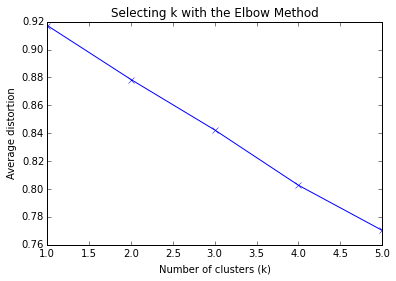

In [38]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

K = range(1,6)
meandisortions = []

for k in K:
	kmeans = KMeans(n_clusters = k)
	kmeans.fit(tfidf_matrix.todense())
	meandisortions.append(sum(np.min(cdist(tfidf_matrix.todense(),kmeans.cluster_centers_,'euclidean'),axis=1))/tfidf_matrix.todense().shape[0])

plt.plot(K,meandisortions,'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [39]:
tfidf_matrix.todense()

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.19700216,  0.00964334],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.00339734,  0.00631945],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.00487551, ...,  0.01256415,
          0.        ,  0.00418805],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.01451274]])

In [58]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [65]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'estimated, matrices, dimensionality,', 
                 1: 'predicting, training, labelled, kernel,', 
                 2: 'graph, nodes, clustering, network, edges,', 
                 3: 'users, events, reviews, twitter', 
                 4: 'topics,communities, regions, latent,'}

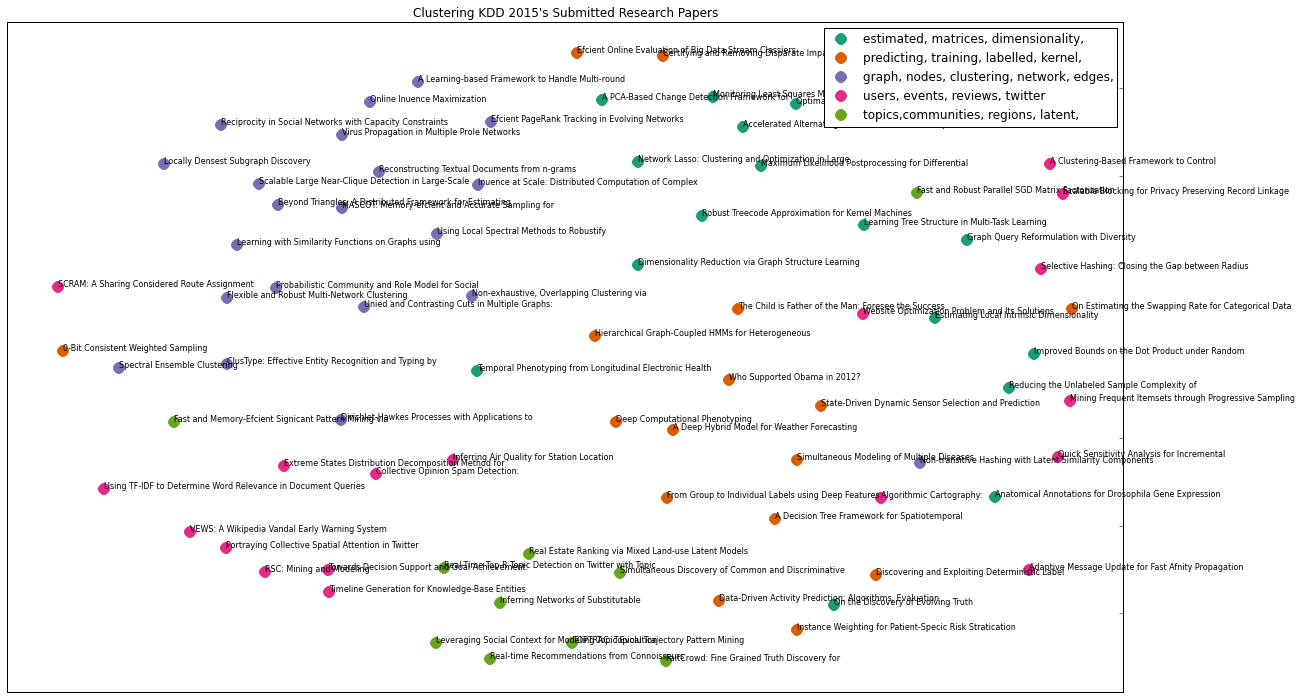

In [67]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
plt.title("Clustering KDD 2015's Submitted Research Papers")    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [61]:
plt.close()

In [68]:
import mpld3
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [79]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,13)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

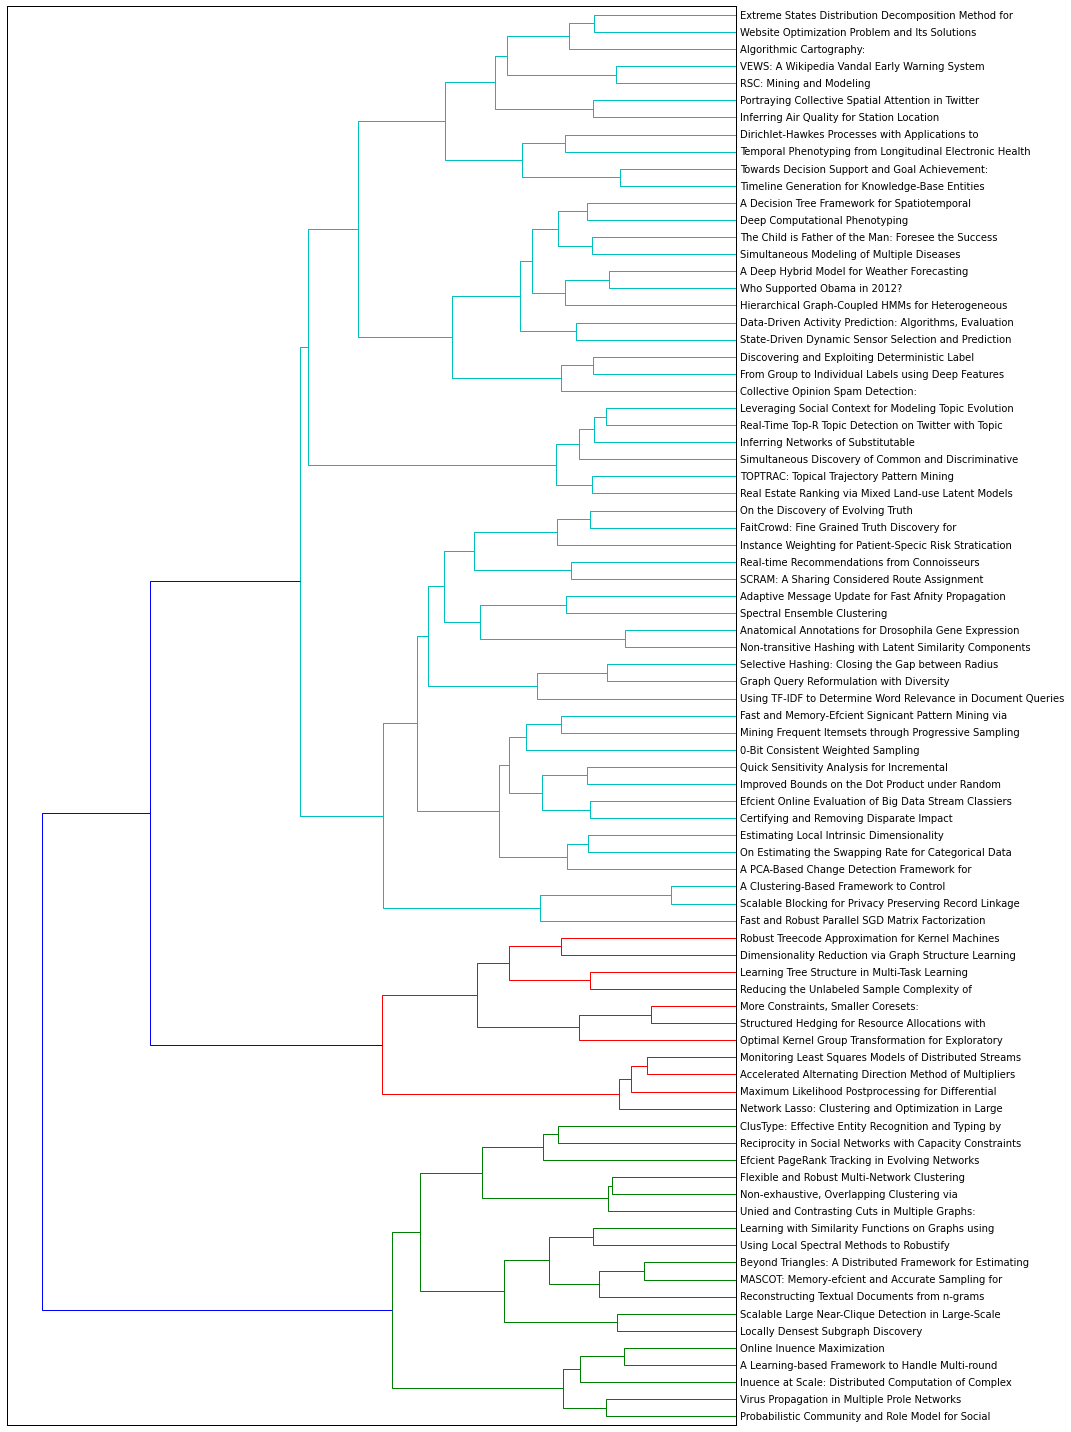

In [80]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [81]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [3]:
import gensim


ImportError: No module named gensim

In [95]:
#remove proper names
%time preprocess = [strip_proppers(doc) for doc in synopses]

NameError: name 'synopses' is not defined